[![Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/DanielAlonsoBastos/AprendizajeProfundo/blob/main/tarea1-redes-densas/1_xnor.ipynb)

# 1. Red de unidades de umbral lineal
Curso: Aprendizaje profundo

Alumno: Daniel Alonso

Programa y evalúa una red de neuronas con funciones de activación escalón unitario que aproxime la función XNOR dada por:

|$x_1$|$x_2$|$y$|
|-----|-----|-----|
|0|0|1|
|0|1|0|
|1|0|0|
|1|1|1|


-----------------------

In [1]:
import numpy as np

La función **XNOR** se puede expresar como $A+B\cdot \overline{A}+ \overline{B}$, donde el + expresa la operación AND, $\cdot$ expresa la operación **OR**, y $\overline{A},\overline{B}$ corresponden a la negación de $A$ y $B$, siendo $A$ y $B$ las entradas, que en este caso serían $x_1$ y $x_2$ respectivamente.

La función **XNOR** entonces, se puede expresar como una composición de funciones como en las redes densas, por lo que se realiza una arquitectura que realice las operaciones $A+B$ y $\overline{A}+ \overline{B}$ en una capa oculta, y finalmente en la capa de salida se realice la operación **OR** con las salidas de la capa oculta, empleando el escalón unitario como función de activación:

\begin{equation}
\phi(z)=\left\{\begin{matrix}
0~~si~~z<0\\ 
1~~si~~z\geq0
\end{matrix}\right.
\end{equation}

En la siguiente imagen se muestra la arquitectura empleada para aproximar la compuerta lógica **XNOR**:

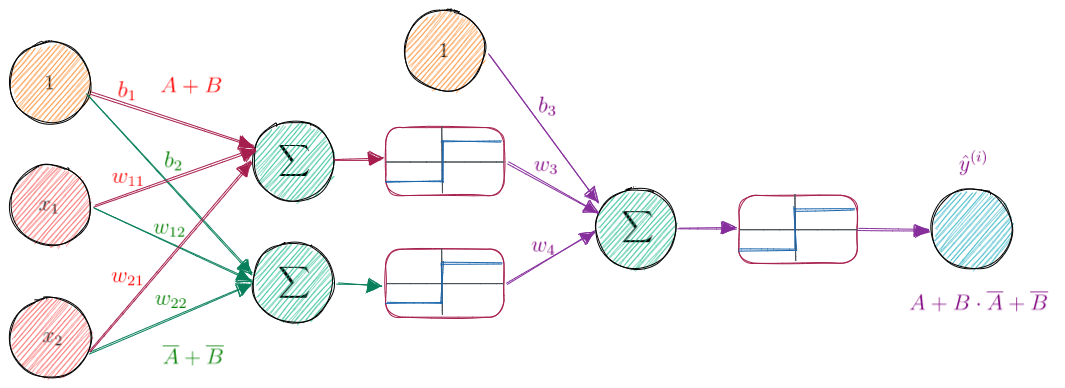

Para obtener los parámetros $\boldsymbol{W},\boldsymbol{b}$ se analizan 3 arquitecturas distintas, una para resolver **AND** ($A+B$), otra para resolver $\overline{A}+ \overline{B}$, y la otra para resolver **OR**.



---



## 1 Aproximación de la compuerta lógica **AND**

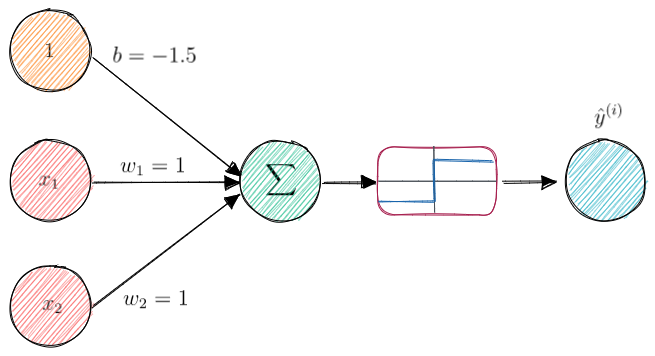

|$x_1$|$x_2$|$x_1 \wedge x_2$| $z=b+w_1 x_1+ w_2x_2$|$\hat{y}=\phi(z)$|
|-----|-----|----------------|----------------------|-----------------|
|$0$|$0$|$0$|$-1.5+(1\cdot 0)+(1\cdot 0)=-1.5$|$0$|
|$1$|$0$|$0$|$-1.5+(1\cdot 0)+(1\cdot 1)=-0.5$|$0$|
|$0$|$1$|$0$|$-1.5+(1\cdot 1)+(1\cdot 0)=-0.5$|$0$|
|$1$|$1$|$1$|$-1.5+(1\cdot 1)+(1\cdot 1)=0.5$|$1$|

## 2 Aproximación de $\overline{A}+ \overline{B}$

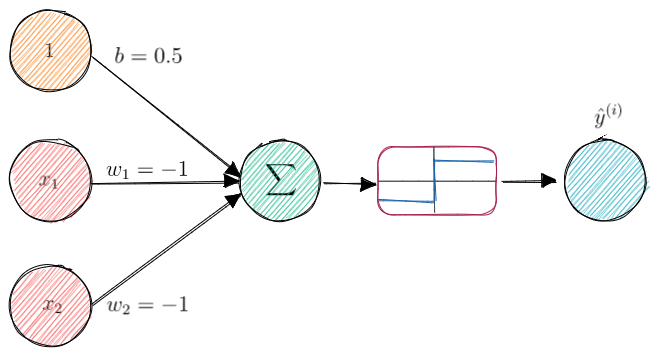

|$x_1$|$x_2$|$\overline{x_1} \wedge \overline{x_2}$| $z=b+w_1 x_1+ w_2x_2$|$\hat{y}=\phi(z)$|
|-----|-----|----------------|----------------------|-----------------|
|$0$|$0$|$1$|$0.5+(-1\cdot 0)+(-1\cdot 0)=0.5$|$1$|
|$1$|$0$|$0$|$0.5+(-1\cdot 0)+(-1\cdot 1)=-0.5$|$0$|
|$0$|$1$|$0$|$0.5+(-1\cdot 1)+(-1\cdot 0)=-0.5$|$0$|
|$1$|$1$|$0$|$0.5+(-1\cdot 1)+(-1\cdot 1)=-1.5$|$0$|

## 3 Aproximación de la compuerta lógica **OR**

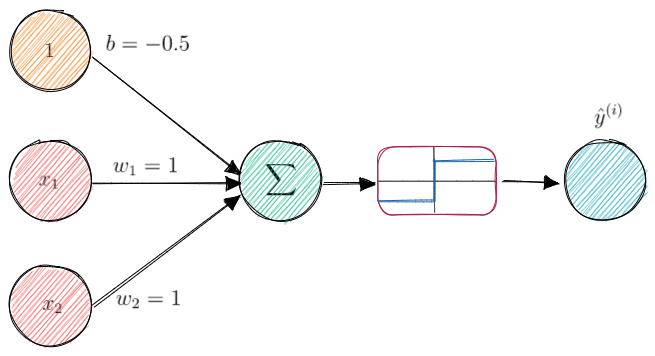

|$x_1$|$x_2$|$x_1 \cdot x_2$| $z=b+w_1 x_1+ w_2x_2$|$\hat{y}=\phi(z)$|
|-----|-----|----------------|----------------------|-----------------|
|$0$|$0$|$0$|$-0.5+(1\cdot 0)+(1\cdot 0)=-0.5$|$0$|
|$1$|$0$|$1$|$-0.5+(1\cdot 0)+(1\cdot 1)=0.5$|$1$|
|$0$|$1$|$1$|$-0.5+(1\cdot 1)+(1\cdot 0)=0.5$|$1$|
|$1$|$1$|$1$|$-0.5+(1\cdot 1)+(1\cdot 1)=1.5$|$1$|

---

## 4 Aproximación de la compuerta lógica **XNOR**

La propagación hacia adelante se realiza de la siguiente manera:

\begin{align}
\boldsymbol{a}^{\left \{ 1 \right \}} &= \boldsymbol{x}^{(i)} \\
\boldsymbol{z}^{\left \{ 2 \right \}} &= \boldsymbol{W}^{\left \{ 1 \right \}^T} \cdot \boldsymbol{a}^{\left \{ 1 \right \}} + \boldsymbol{b}^{\left \{ 1 \right \}} \\
\boldsymbol{a}^{\left \{ 2 \right \}} &= \phi(\boldsymbol{z}^{\left \{ 2 \right \}}) \\
\boldsymbol{z}^{\left \{ 3 \right \}} &= \boldsymbol{W}^{\left \{ 2 \right \}^T} \cdot \boldsymbol{a}^{\left \{ 2 \right \}} + \boldsymbol{b}^{\left \{ 2 \right \}} \\
\boldsymbol{a}^{\left \{ 3 \right \}} &= \phi(\boldsymbol{z}^{\left \{ 3 \right \}}) \\
\hat{y}^{(i)} &= \boldsymbol{a}^{\left \{ 3 \right \}}
\end{align}

In [2]:
def forward(x,W1,b1,W2,b2):
  a1 = x
  z2 = np.dot(W1.T,a1) + b1
  a2 = np.heaviside(z2,1) # escalon unitario
  z3 = np.dot(W2.T,a2) + b2
  a3 = np.heaviside(z3,1) # escalon unitario
  return int(a3)

Los parámetros $\boldsymbol{W},\boldsymbol{b}$ se calculan como:

\begin{equation}
\boldsymbol{W}^{\left \{ 1 \right \}} = \begin{bmatrix}
{\color{Red} {w_{11}}} & {\color{DarkGreen} {w_{12}}} \\ 
{\color{Red} {w_{21}}} & {\color{DarkGreen} {w_{22}}}
\end{bmatrix} =
\begin{bmatrix}
{\color{Red} 1} & {\color{DarkGreen} {-1}} \\ 
{\color{Red} 1} & {\color{DarkGreen} {-1}}
\end{bmatrix}
\end{equation}

\begin{equation}
\boldsymbol{b}^{\left \{ 1 \right \}} = \begin{bmatrix}
{\color{Red} {b_{1}}} \\ 
{\color{DarkGreen} {b_{2}}}
\end{bmatrix} =
\begin{bmatrix}
{\color{Red} {-1.5}} \\ 
{\color{DarkGreen} {0.5}}
\end{bmatrix}
\end{equation}

\begin{equation}
\boldsymbol{W}^{\left \{ 2 \right \}} = \begin{bmatrix}
{\color{Purple} {w_{3}}} \\ 
{\color{Purple} {w_{4}}}
\end{bmatrix} =
\begin{bmatrix}
{\color{Purple} 1} \\ 
{\color{Purple} 1}
\end{bmatrix}
\end{equation}

\begin{equation}
\boldsymbol{b}^{\left \{ 2 \right \}} = \begin{bmatrix}
{\color{Purple} {b_{3}}}
\end{bmatrix} =
\begin{bmatrix}
{\color{Purple} {-0.5}}
\end{bmatrix}
\end{equation}

In [3]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]]) # instancias de X
W1 = np.array([[1,-1],[1,-1]])
b1 = np.array([-1.5,0.5])
W2 = np.array([1,1])
b2 = np.array([-0.5])

A continuación se ejecuta el paso hacia adelante de la arquitectura propuesta para calcular la función **XNOR**:

In [4]:
print('x1| x2| XNOR')
print('--|---|----')
for x in X:
  y_hat = forward(x,W1,b1,W2,b2)
  print(f'{ x[0]} | {x[1]} | {y_hat}')

x1| x2| XNOR
--|---|----
0 | 0 | 1
0 | 1 | 0
1 | 0 | 0
1 | 1 | 1
